In [32]:
import tensorflow as tf
from tensorflow  import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.applications import vgg16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

from matplotlib import pyplot



Reload our VGG16 model with the imagenet weights.

In [5]:
vgg = tf.keras.applications.VGG16(include_top=True, weights='imagenet')

In [ ]:
vgg.summary()

Extract the convolutional layers only, as all we want are the filters and biases values of these.
Inspect the bias and weights using from the third convolutional layer using get_weights().

In [24]:
list_conv=[]

for layer in vgg.layers:
    if layer.name[-5:-1]=="conv":
        list_conv.append(layer.name)
        if int(layer.name[5])>2:
            filters, biases = layer.get_weights()
            print(layer.name, "filters", filters, "biaises", biases)
print(list_conv)

block3_conv1 filters [[[[ 2.48631509e-03  3.29096033e-03 -3.13071609e-02 ...  4.71851649e-03
     6.10046380e-04  1.08059337e-02]
   [ 1.36040282e-02  3.80906137e-03 -3.50438058e-02 ...  8.50365497e-03
     4.99894470e-03  2.45373725e-04]
   [-1.02960337e-02  1.11045251e-02 -1.05560301e-02 ...  1.18119251e-02
     4.14630165e-03  1.04994141e-02]
   ...
   [ 2.14050314e-03  2.17348989e-03 -4.09283377e-02 ... -8.34189355e-03
     2.35738587e-02 -1.85471829e-02]
   [ 1.61261633e-02  8.04742594e-05 -3.95269990e-02 ... -3.94453527e-03
     8.42030905e-03 -6.98040065e-04]
   [-3.51465750e-03  1.08316056e-02 -2.23830044e-02 ...  1.92155335e-02
     4.21972945e-03 -1.55707300e-02]]

  [[ 6.11093594e-03  5.44822821e-03  1.57541838e-02 ...  5.60781872e-03
     1.93978904e-03  1.49202365e-02]
   [-3.13426033e-02  1.45718846e-02  1.18744513e-02 ...  1.21863568e-02
     1.49443159e-02  2.60730181e-03]
   [-2.32275911e-02  2.08911151e-02  1.11537259e-02 ...  2.36150771e-02
     1.06090466e-02  4.312

  8.00405815e-03  1.03328384e-01  6.38187110e-01 -2.65396535e-02]
['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Now plot the first 6 convolution filters, and view each filter channel (RBG) separately:
    - First, normalize the filter values between 0 and 1 so that we can visualize them.
    - Get the value by using f = filters[:, :, :, i].
    - Plot or visualize it by using plt.imshow(f[:, :, j], cmap='gray')

(3, 3, 3, 64)


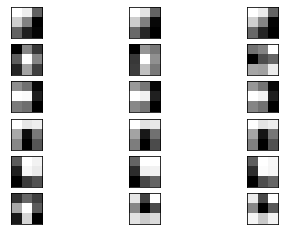

(3, 3, 64, 64)


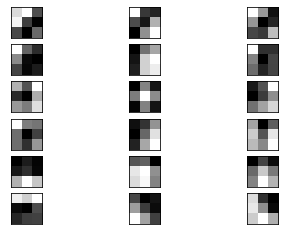

(3, 3, 64, 128)


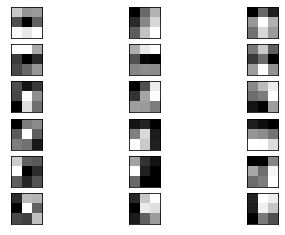

(3, 3, 128, 128)


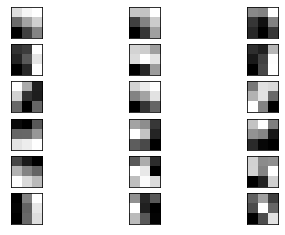

(3, 3, 128, 256)


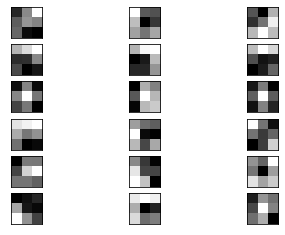

(3, 3, 256, 256)


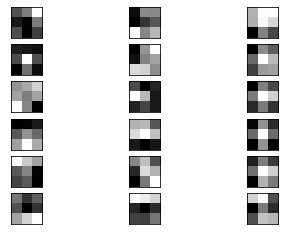

(3, 3, 256, 256)


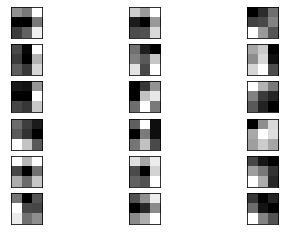

(3, 3, 256, 512)


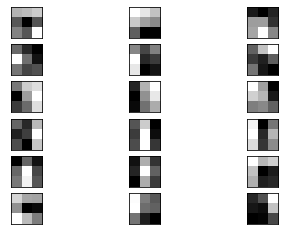

(3, 3, 512, 512)


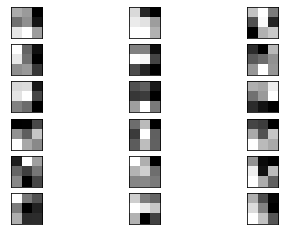

(3, 3, 512, 512)


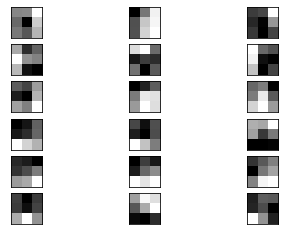

(3, 3, 512, 512)


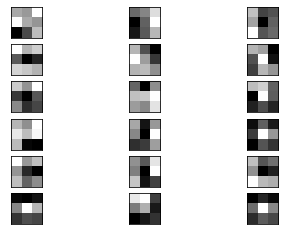

(3, 3, 512, 512)


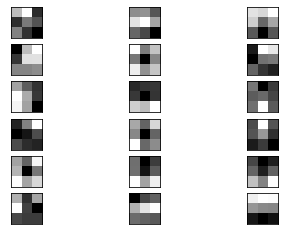

(3, 3, 512, 512)


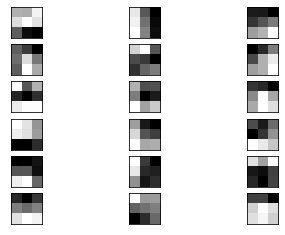

In [35]:
nb = 0

for layer in vgg.layers:
    if layer.name[-5:-1]=="conv":
        filters, biases = layer.get_weights()
        max_filters = filters.max()
        min_filters = filters.min()
        filters = (filters - min_filters) / (max_filters - min_filters)
        print(filters.shape)
        ix = 1
        nb_filters = 6
        for i in range(nb_filters):
            f = filters[:, :, :, i]
            for j in range(3):
                ax = pyplot.subplot(nb_filters, 3, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(f[:, :, j], cmap='gray')
                ix += 1
        pyplot.show()



Visualize the feature maps of VGG16 by running an input image through the model.

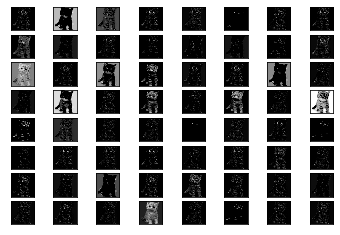

In [72]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

#load the model
model = Model(inputs=vgg.input, outputs=vgg.layers[1].output)

# load the image with the required shape
image = load_img("C:/Users/Allard/Pictures/chat.jfif", target_size=(224, 224))

# convert the image to an array
image_array = img_to_array(image)

# expand dimensions so that it represents a single 'sample'
image_expand = np.expand_dims(image_array, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
image_prepro = preprocess_input(image_expand)

# get feature map for first hidden layer
pred = model.predict(image_prepro)

# plot the output 64 filters
ix = 1
nb_filters = pred.shape[3]
for i in range(nb_filters):
    f = pred[:, :, :, i]
    ax = pyplot.subplot(8, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[0,:,:], cmap='gray')
    ix += 1
pyplot.show()

Plot these feature maps for the outputs of the 5 convolution blocks, indexed by [2, 5, 9, 13, 17].

Layer number  2


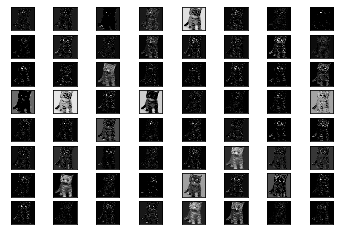

Layer number  5


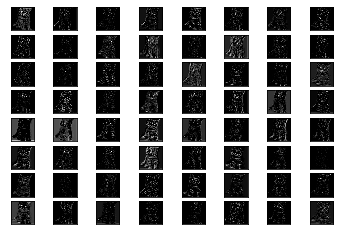

Layer number  9


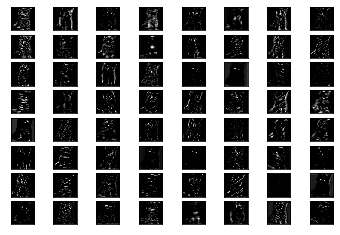

Layer number  13


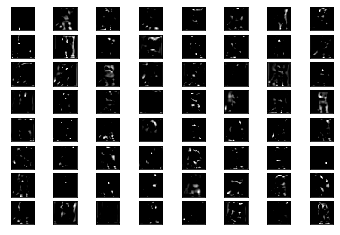

Layer number  17


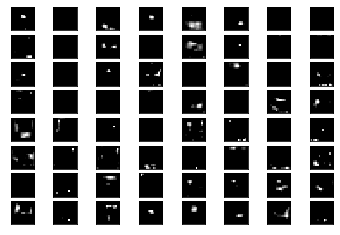

In [76]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [vgg.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
image = load_img("C:/Users/Allard/Pictures/chat.jfif", target_size=(224, 224))

# convert the image to an array
image_array = img_to_array(image)

# expand dimensions so that it represents a single 'sample'
image_expand = np.expand_dims(image_array, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
image_prepro = preprocess_input(image_expand)

# get feature map for first hidden layer
feature_maps = model.predict(image_prepro)

# plot the output from each block
square = 8
k=0
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    print("Layer number ", ixs[k])
    k += 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()